In [1]:
import os
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
# Changing Directory
os.chdir("D:\dataset")


In [3]:
# Reading Data
df = pd.read_csv('train.csv')
df.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


## Selecting Wanted Features

In [4]:
# Define our features
features = ["click", "weekday", "hour", "region", "slotwidth", 'slotheight', 'useragent']
df = df[features]
df = df.dropna()

In [5]:
df['slotsize'] = df['slotwidth'] * df['slotheight'] 
df.drop(['slotwidth', 'slotheight'], axis=1, inplace=True)

In [6]:
df.head()

,click,weekday,hour,region,useragent,slotsize
0,0,1,14,80,windows_ie,28080
1,0,2,20,94,windows_chrome,62500
2,0,5,9,216,windows_ie,94080
3,0,2,20,216,windows_ie,65520
4,0,6,9,40,windows_chrome,85500


## Labeling and Categorising Data

Categorising:
- Hour: 
    - 0:00~07:59 : 1
    - 08:00~15:59: 2
    - 16:00~23:59: 3
- Size:
    - 0~40000     : 1
    - 40000~80000 : 2
    - 80000~120000: 3

In [7]:
df['hour'] = pd.cut(df['hour'], bins = [0,8,16,23.5], right=False, labels=[1,2,3])
df['slotsize'] = pd.cut(df['slotsize'], bins = [0,40000,80000,120000], right=True, labels=[1,2,3])
df.head()  

,click,weekday,hour,region,useragent,slotsize
0,0,1,2,80,windows_ie,1
1,0,2,3,94,windows_chrome,2
2,0,5,2,216,windows_ie,3
3,0,2,3,216,windows_ie,2
4,0,6,2,40,windows_chrome,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2697738 entries, 0 to 2697737
Data columns (total 6 columns):
click        int64
weekday      int64
hour         category
region       int64
useragent    object
slotsize     category
dtypes: category(2), int64(3), object(1)
memory usage: 108.1+ MB


In [9]:
df = df.dropna()
df.isnull().any().any()

False

### Dummy Coding

In [10]:
df.useragent.value_counts()

windows_ie          1619590
windows_chrome       885179
android_safari        67728
mac_safari            41409
windows_firefox       24765
windows_theworld      15305
windows_other         12461
mac_other              8700
windows_maxthon        8075
windows_opera          2434
mac_chrome             2119
android_other          1956
other_other            1788
windows_safari         1727
linux_chrome           1060
mac_firefox             844
android_chrome          510
android_opera           504
ios_safari              433
linux_firefox           413
linux_safari            133
other_opera             126
linux_other              64
other_safari             63
android_maxthon          35
mac_maxthon              35
ios_other                31
other_ie                 28
linux_opera              20
linux_ie                 19
android_firefox          18
mac_opera                18
android_sogou            15
mac_sogou                14
other_chrome             13
android_ie          

In [11]:
from collections import Counter

In [12]:
len(df.copy().useragent.tolist())

2697646

In [14]:
useragent_processing_platform = useragent_processing(df)

In [15]:
Counter(useragent_processing_platform)

Counter({0: 2569540, 1: 70774, 2: 53140, 3: 1709, 4: 464, 5: 2019})

In [16]:
df_index = df.index.get_values()

In [18]:
df = dummy_coding(df)

In [19]:
df

,click,weekday,hour,region,useragent,slotsize,agent_windows,agent_android,agent_mac,agent_linux,agent_ios,agent_other
0,0,1,2,80,windows_ie,1,1,0,0,0,0,0
1,0,2,3,94,windows_chrome,2,1,0,0,0,0,0
2,0,5,2,216,windows_ie,3,1,0,0,0,0,0
3,0,2,3,216,windows_ie,2,1,0,0,0,0,0
4,0,6,2,40,windows_chrome,3,1,0,0,0,0,0
5,0,3,3,3,windows_ie,2,1,0,0,0,0,0
6,0,5,3,216,windows_chrome,2,1,0,0,0,0,0
7,0,0,3,216,windows_chrome,3,1,0,0,0,0,0
8,0,4,3,201,windows_ie,3,1,0,0,0,0,0
9,0,0,3,55,windows_ie,3,1,0,0,0,0,0


In [20]:
df["hour"] = df["hour"].cat.codes
df["slotsize"] = df["slotsize"].cat.codes

In [21]:
df = df.drop('useragent', axis =1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2697646 entries, 0 to 2697737
Data columns (total 11 columns):
click            int64
weekday          int64
hour             int8
region           int64
slotsize         int8
agent_windows    int32
agent_android    int32
agent_mac        int32
agent_linux      int32
agent_ios        int32
agent_other      int32
dtypes: int32(6), int64(3), int8(2)
memory usage: 149.2 MB


In [23]:
df.head()

,click,weekday,hour,region,slotsize,agent_windows,agent_android,agent_mac,agent_linux,agent_ios,agent_other
0,0,1,1,80,0,1,0,0,0,0,0
1,0,2,2,94,1,1,0,0,0,0,0
2,0,5,1,216,2,1,0,0,0,0,0
3,0,2,2,216,1,1,0,0,0,0,0
4,0,6,1,40,2,1,0,0,0,0,0


## Training Logistic Regression (linear_model.LogisticRegression)

### Spliting data into training and test set

To avoid **overfitting**, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set **``X_test, y_test``**. Now we will split the data into a training set and a testing set and then train our model.

In [24]:
try:
    from sklearn.model_selection import train_test_split, cross_val_score
except ImportError:
    from sklearn.cross_validation import train_test_split, cross_val_score

In [25]:
# Defining X and Y
X = df[[col for col in df.columns if col not in ['click']]]
Y = df['click']

In [26]:
# Train set is 60% of data and test set is 40% of data 
X_train, X_test, y_train, y_test = train_test_split(\
        X, Y, test_size=0.4, random_state=0)

### Choose the Estimator
We will use **``linear_model.LogisticRegression()``** from **`sklearn`** module.

In [27]:
# Training the model
logreg = linear_model.LogisticRegression()

In [28]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
print(logreg.coef_)
print(logreg.intercept_)

[[ -2.04798403e-02   6.49670078e-02  -8.59540493e-06   8.91619205e-02
   -2.41512929e+00  -2.29402364e-01  -5.97063266e-01  -6.46595503e-01
   -3.92998497e-01  -9.13999422e-01]]
[-5.19518834]


### Inspecting Scores of Test Data and Predicting Probability of Test Data

In [30]:
logreg.score(X_test, y_test)

0.99922988455682216

In [31]:
logreg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
narray = logreg.predict(X_test)
print(narray.sum())

0


In [33]:
logreg.predict_proba(X_test)

array([[  9.99393993e-01,   6.06007353e-04],
       [  9.99434637e-01,   5.65363296e-04],
       [  9.99430461e-01,   5.69538989e-04],
       ..., 
       [  9.99431575e-01,   5.68424561e-04],
       [  9.99468866e-01,   5.31134143e-04],
       [  9.99422489e-01,   5.77510711e-04]])

In [34]:
len(logreg.predict_proba(X_test))

1079059

In [35]:
probarray = logreg.predict_proba(X_test)
probdf =pd.DataFrame(probarray)

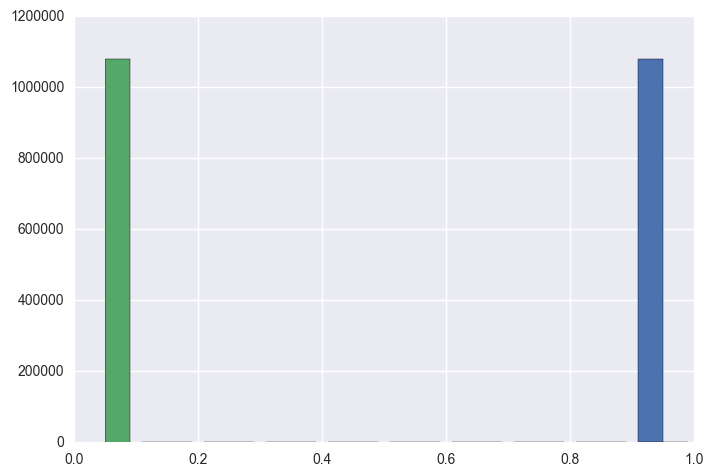

In [36]:
plt.hist(probarray)
#plt.yscale('log')
plt.show()

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


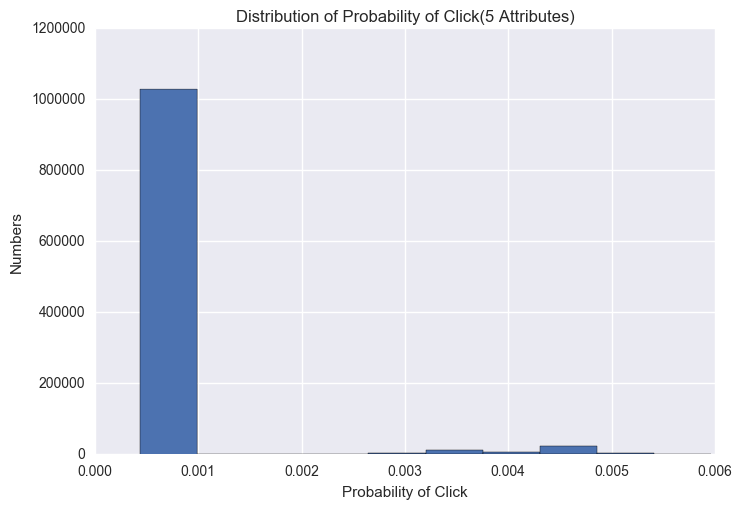

In [37]:
plt.xlabel('Probability of Click')
plt.ylabel('Numbers')
probdf.loc[:,1].hist()
#plt.yscale('log')
plt.title("Distribution of Probability of Click(5 Attributes)")
plt.legend()
plt.show()


In [38]:
pd.DataFrame(narray).to_csv('narray.csv', encoding='utf-8')
pd.DataFrame(probarray).to_csv('probarray.csv', encoding='utf-8')

## Training Logistic Regression (linear_model.LogisticRegressionCV)

In [51]:
# Defining X and Y
X = df[[col for col in df.columns if col not in ['click']]]
Y = df['click']

In [53]:
# Training the model
logregCV = linear_model.LogisticRegressionCV()

In [56]:
logregCV.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [57]:
logregCV.score(X_test, y_test)

0.99922988455682216

In [58]:
logregCV.predict_proba(X_test)

array([[  9.99255952e-01,   7.44048118e-04],
       [  9.99252936e-01,   7.47064278e-04],
       [  9.99260319e-01,   7.39680549e-04],
       ..., 
       [  9.99275202e-01,   7.24797884e-04],
       [  9.99260294e-01,   7.39705662e-04],
       [  9.99247029e-01,   7.52971197e-04]])

In [60]:
probarray2 = logregCV.predict_proba(X_test)
probdf =pd.DataFrame(probarray2)

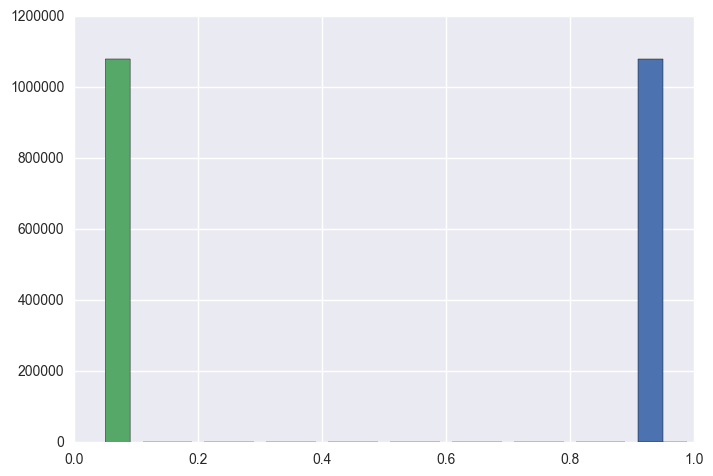

In [61]:
plt.hist(probarray2)
#plt.yscale('log')
plt.show()

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


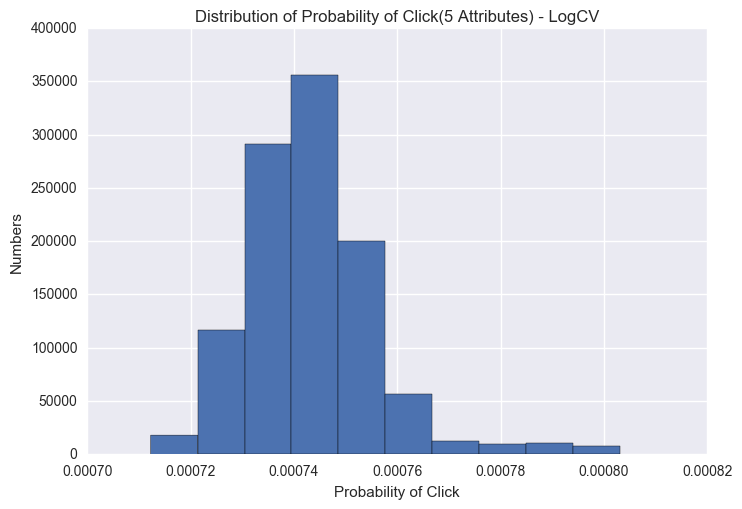

In [62]:
plt.xlabel('Probability of Click')
plt.ylabel('Numbers')
probdf.loc[:,1].hist()
#plt.yscale('log')
plt.title("Distribution of Probability of Click(5 Attributes) - LogCV")
plt.legend()
plt.show()

## Training Logistic Regression (linear_model.SGDClassifier(loss='log'))

In [63]:
# Defining X and Y
X = df[[col for col in df.columns if col not in ['click']]]
Y = df['click']

In [64]:
# Training the model
SGDlog = linear_model.SGDClassifier(loss='log')

In [66]:
SGDlog.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [67]:
SGDlog.score(X_test, y_test)

0.99922988455682216

In [68]:
SGDlog.predict_proba(X_test)

array([[  9.99615749e-01,   3.84250599e-04],
       [  9.99999951e-01,   4.87855092e-08],
       [  9.99999695e-01,   3.04834289e-07],
       ..., 
       [  1.00000000e+00,   7.22921899e-17],
       [  1.00000000e+00,   4.87424900e-13],
       [  9.99667366e-01,   3.32634086e-04]])

In [70]:
probarray3 = SGDlog.predict_proba(X_test)
probdf =pd.DataFrame(probarray3)

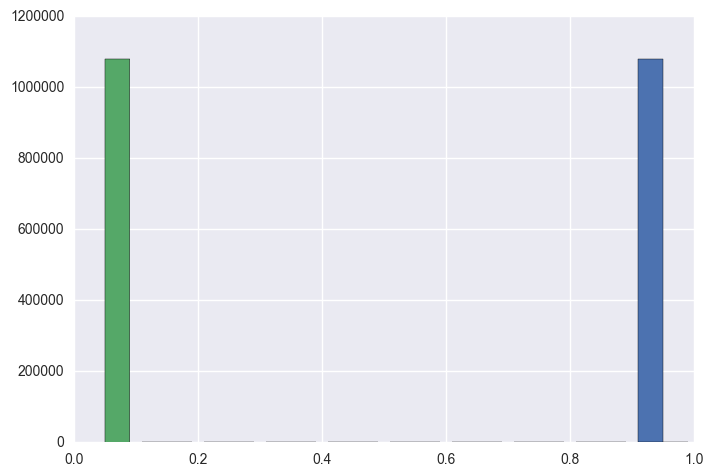

In [71]:
plt.hist(probarray3)
#plt.yscale('log')
plt.show()

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


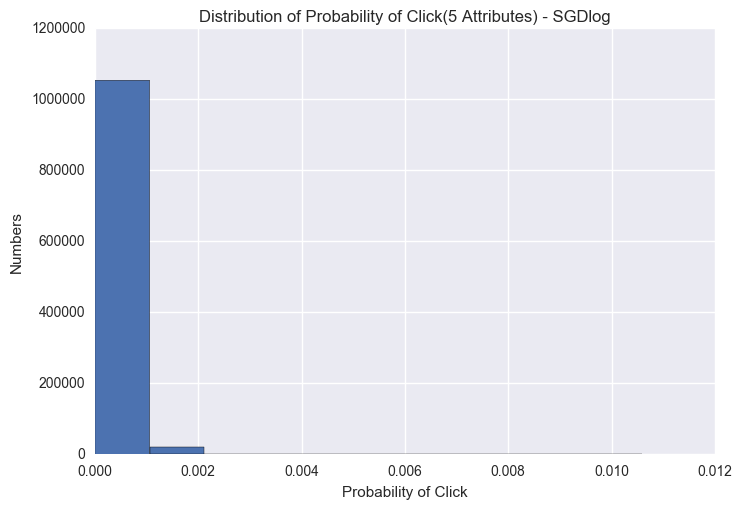

In [72]:
plt.xlabel('Probability of Click')
plt.ylabel('Numbers')
probdf.loc[:,1].hist()
#plt.yscale('log')
plt.title("Distribution of Probability of Click(5 Attributes) - SGDlog")
plt.legend()
plt.show()

In [87]:
from sklearn import linear_model

## Ridge

In [101]:
features_2 = ["click", "weekday", "hour", "region", "slotsize"]
df_2 = df[features_2]
df_2 = df_2.dropna()

In [102]:
df_2.head()

,click,weekday,hour,region,slotsize
0,0,1,1,80,0
1,0,2,2,94,1
2,0,5,1,216,2
3,0,2,2,216,1
4,0,6,1,40,2


In [108]:
# Defining X and Y
X_2 = df_2[[col for col in df_2.columns if col not in ['click']]]
Y_2 = df_2['click']

In [109]:
# Train set is 60% of data and test set is 40% of data 
X_train, X_test, y_train, y_test = train_test_split(\
        X_2, Y_2, test_size=0.4, random_state=0)

In [110]:
clf = linear_model.Ridge (alpha = 0.5)

In [111]:
X_train

,weekday,hour,region,slotsize
934580,4,0,146,1
1416611,6,2,27,1
380838,0,1,134,1
1613793,3,2,216,2
1537420,1,2,124,1
1572872,5,2,124,1
1408231,6,1,80,1
2546433,3,1,146,2
2598353,5,2,80,1
1180245,6,0,27,1


In [112]:
clf.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [113]:
clf.score(X_test, y_test)

4.8914613401174201e-05

## Lasso

In [83]:
clf = linear_model.Lasso(alpha = 0.1)

In [84]:
# Train set is 60% of data and test set is 40% of data 
X_train, X_test, y_train, y_test = train_test_split(\
        X, Y, test_size=0.4, random_state=0)

In [85]:
clf.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
clf.score(X_test, y_test)

-9.3856013649862291e-07